In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Evita Costa/Documents/internship/Prodigy InfoTech/train.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

### Data Cleaning

In [4]:
#Total number of null values in each column
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Replacing the missing values
df['Age'].fillna(df['Age'].median(),inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#dropping the name & cabin column
drop = ['Name','Cabin']
df.drop(drop, axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [8]:
#Checking for the duplicated values
df.duplicated().sum()

0

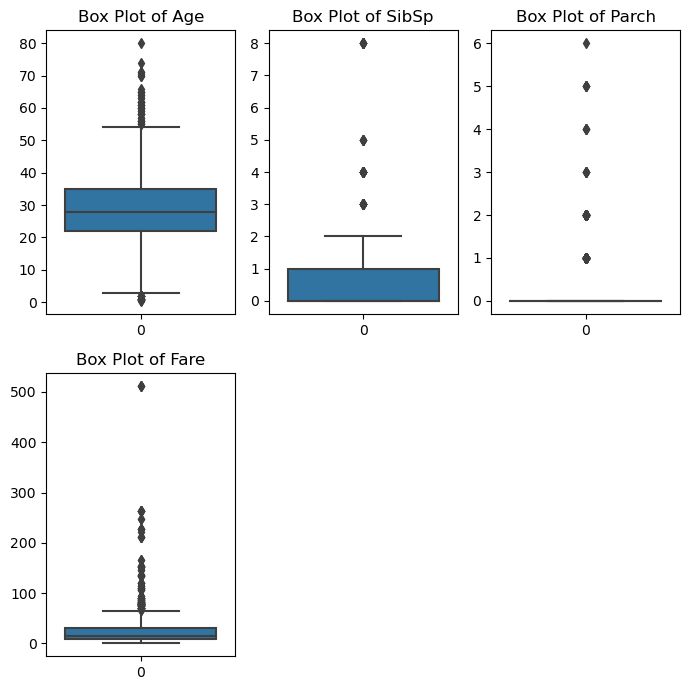

In [9]:
#checking for outliers
feat = ['Age','SibSp','Parch','Fare']
plt.figure(figsize=(7,7))
for i, feat in enumerate(feat,1):
    plt.subplot(2,3,i)
    sns.boxplot(df[feat])
    plt.title(f'Box Plot of {feat}')
plt.tight_layout()
plt.show()

### EDA

In [10]:
#Summary Statics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


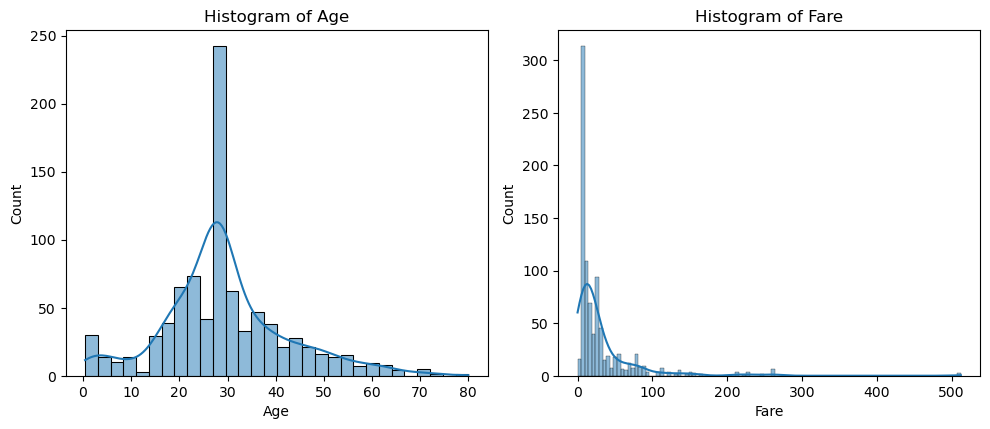

In [11]:
#Distribution of Variables
feat = ['Age','Fare']
plt.figure(figsize=(10, 8))
for i, feat in enumerate(feat,1):
    plt.subplot(2,2,i)
    sns.histplot(df[feat], kde = True)
    plt.title(f'Histogram of {feat}')
plt.tight_layout()
plt.show()

#### Interpretation:
Histogram of Age: indicates that many passengers on board the tiatanic were in the age group of 25-30

Histogram of Fare: indicates that most of the fares are low, with a few high fare values 

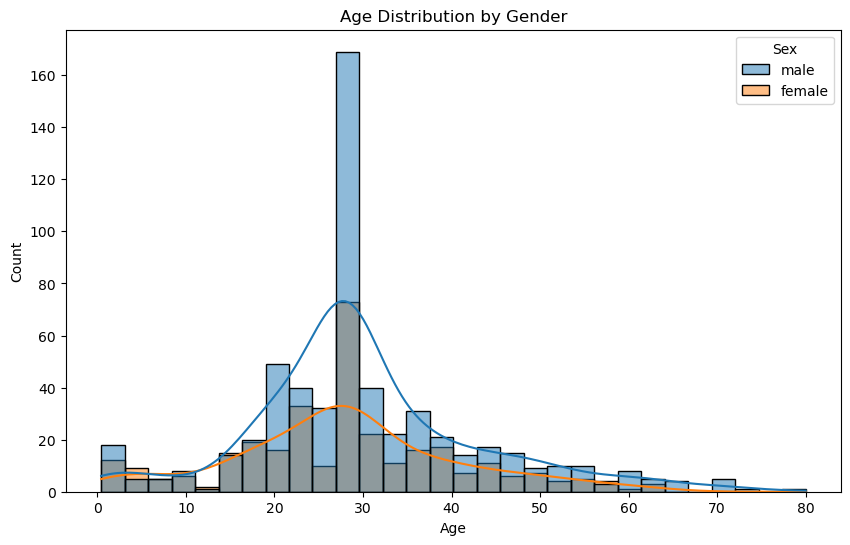

In [12]:
#Distribution of ages of the passengers
plt.figure(figsize=(10,6))
sns.histplot(data=df,hue='Sex',kde=True,x='Age')
plt.title('Age Distribution by Gender')
plt.show()

#### Interpretation:
Age distribution by Gender - when comparing the age distribution in males and females, there is a high concentration of males around the age of 30, while females are more evenly distributed across different age ranges.

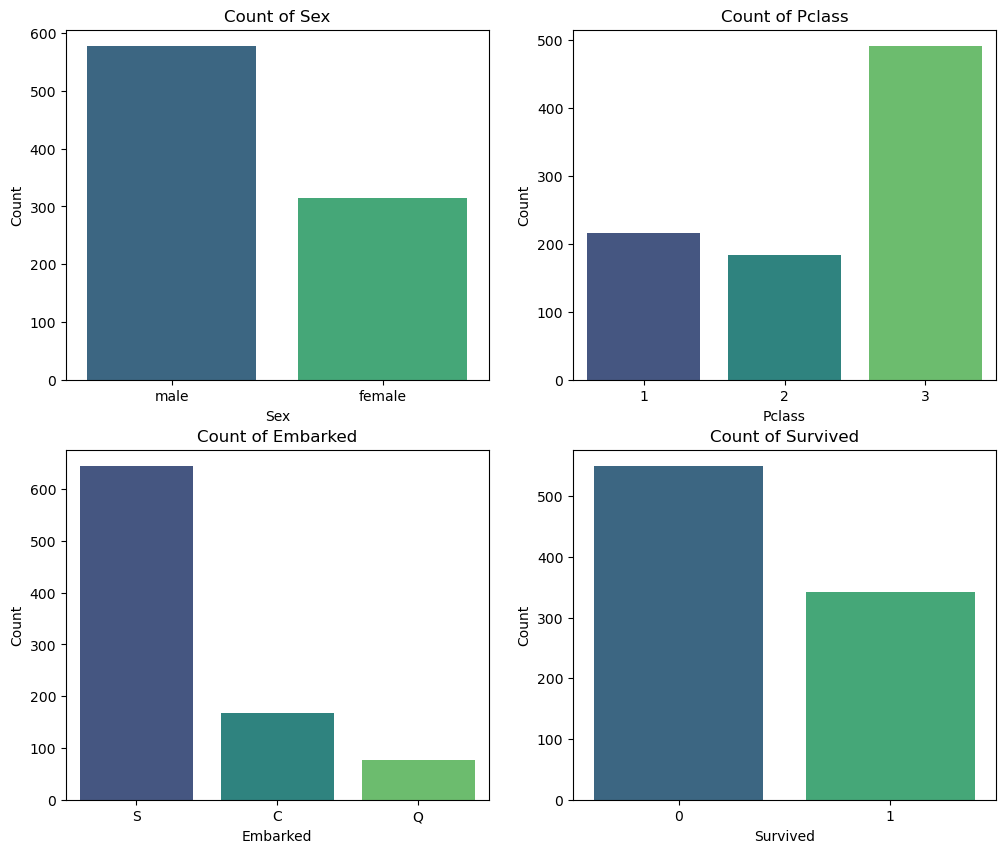

In [13]:
cate_feat = ['Sex', 'Pclass', 'Embarked','Survived']
plt.figure(figsize=(12, 10))
for i, col in enumerate(cate_feat, 1):
    plt.subplot(2, 2, i)
    cate_count = df[col].value_counts()
    sns.barplot(x=cate_count.index, y=cate_count.values, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.show()

#### Interpretation:
Count of Sex: More males than females.

Count of Passenger Class: Majority of the passengers on board were of the third class (Pclass 3), followed by the first class (Pclass 1), and then the second class (Pclass 2).

Count of Embarkation: Most passengers embarked from 'S' (Southampton), with fewer from 'C' (Cherbourg) and 'Q' (Queenstown).

Count of Survivors: There were more non-survivors than survivors.

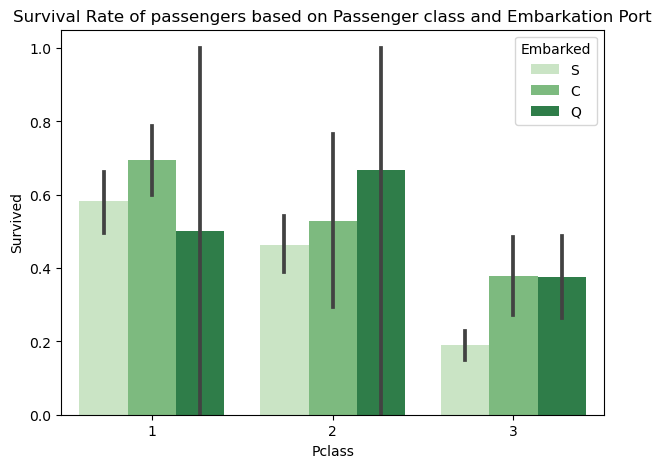

In [14]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, hue = 'Embarked', x='Pclass',y = 'Survived', palette='Greens')
plt.title('Survival Rate of passengers based on Passenger class and Embarkation Port')
plt.show()

#### Interpretation:
The graph shows that the survival rate was highest for first-class passengers and varied by the embarkation port, with port 'C' (Cherbourg) generally having higher survival rates across different classes.

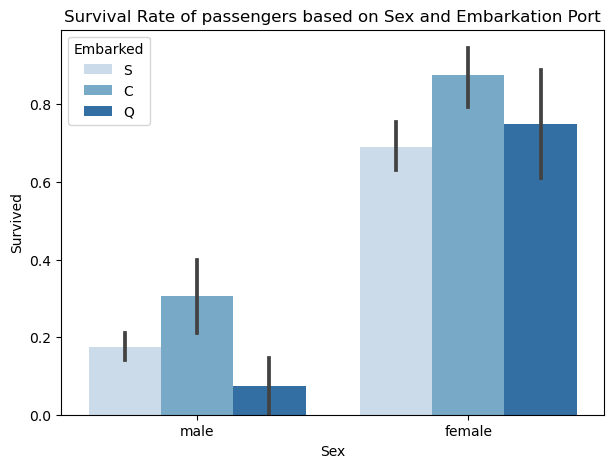

In [15]:
plt.figure(figsize=(7,5))
sns.barplot(data = df, x = 'Sex', y = 'Survived', hue = 'Embarked', palette='Blues')
plt.title('Survival Rate of passengers based on Sex and Embarkation Port')
plt.show()

#### Interpretation:
The graph indicates that females had a much higher survival rate compared to males, regardless of the embarkation port. Passengers embarking from 'C' (Cherbourg) generally had better survival rates.

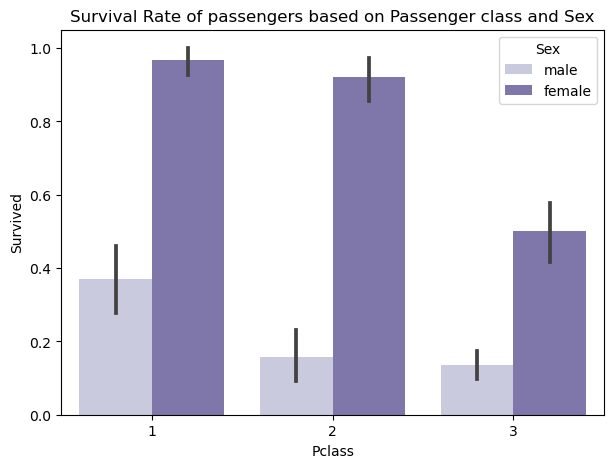

In [16]:
plt.figure(figsize=(7,5))
sns.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex', palette='Purples')
plt.title('Survival Rate of passengers based on Passenger class and Sex')
plt.show()

#### Interpretation:
The graph indicates that females had a much higher survival rate compared to males, regardless of the Passenger class. Passengers from the 1st and 2nd class had better survival rates.

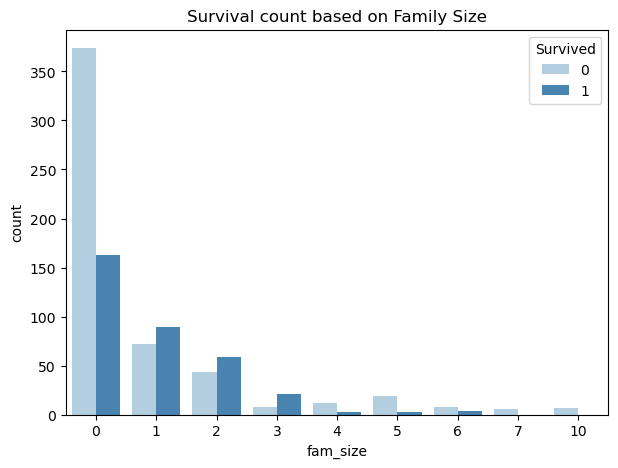

In [17]:
plt.figure(figsize=(7,5))
df['fam_size'] = df['SibSp'] + df['Parch']
sns.countplot(data = df, x = 'fam_size', hue = 'Survived', palette = 'Blues')
plt.title('Survival count based on Family Size')
plt.show()

#### Interpretation:
The graph indicates that people with a smaller family size or those who travelled solo had a much higher survival rate than those who had a large family size.

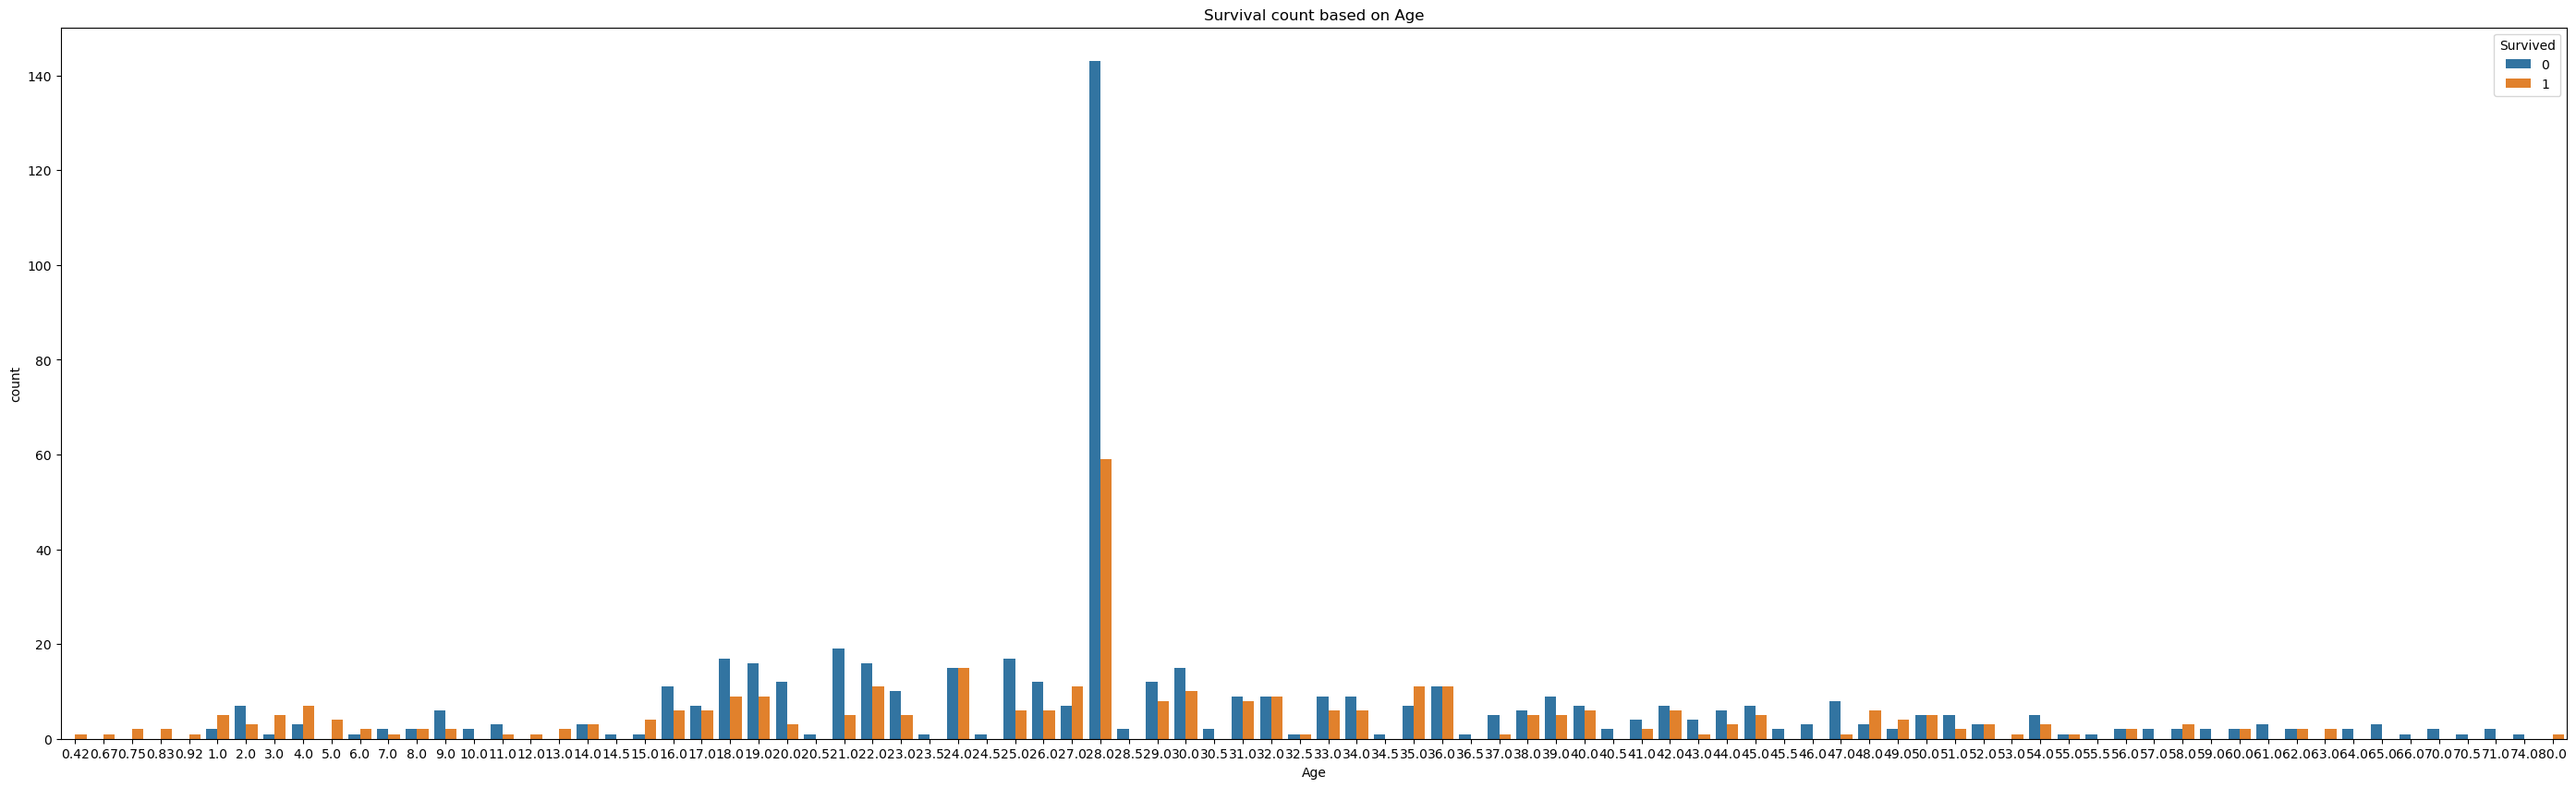

In [18]:
plt.figure(figsize = (35,10))
sns.countplot(data = df, x = 'Age', hue = 'Survived')
plt.title('Survival count based on Age')
plt.show()

#### Interpretation:
This graph shows that children and young adults had a higher survival rates compared to older individuals.

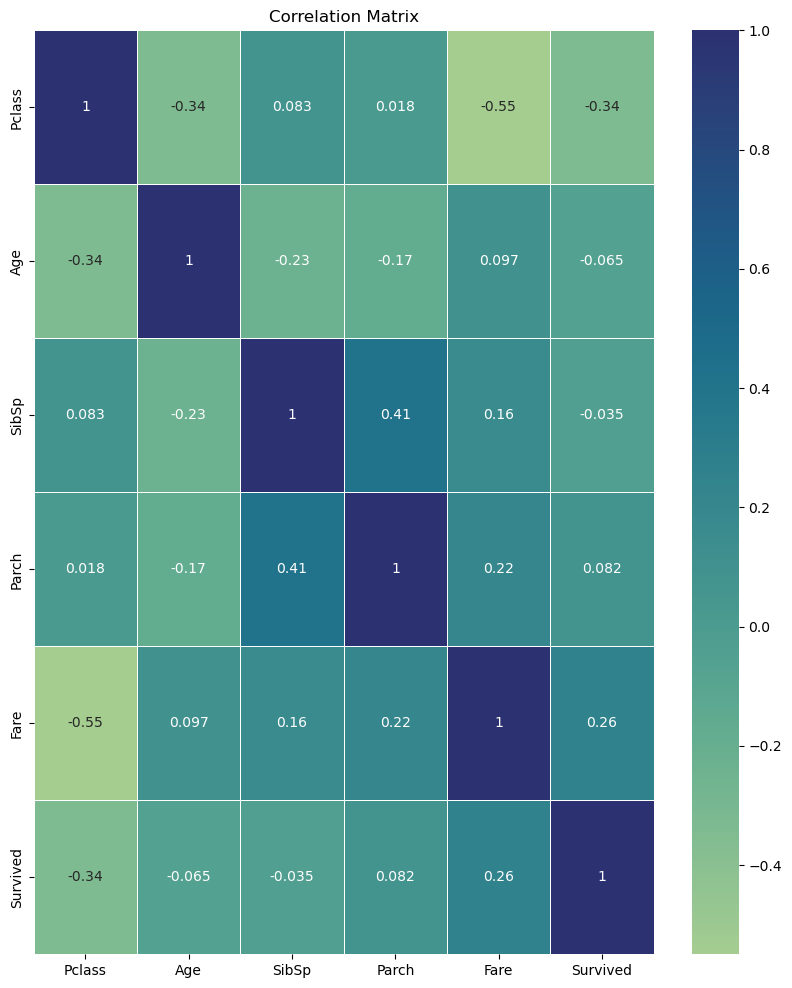

In [19]:
#Correlation Analysis
#numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cate_feat = ['Pclass','Age','SibSp','Parch','Fare','Survived']
corr_mat = df[cate_feat].corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr_mat,annot=True,linewidths=0.5,cmap='crest')
plt.title('Correlation Matrix')
plt.show()

#### Interpretation:
Passenger class and Fare: There is a strong negative correlation (-0.55). As the class decreases (from 1st to 3rd), the fare tends to decrease.

Passenger class and Survived: There is a moderate negative correlation (-0.34). Higher-class passengers had higher survival rates.

Fare and Survived: There is a moderate positive correlation (0.26). Passengers who paid higher fares had higher survival rates.

SibSp and Parch: There is a moderate positive correlation (0.41). Passengers with siblings/spouses on board also tended to have parents/children on board.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


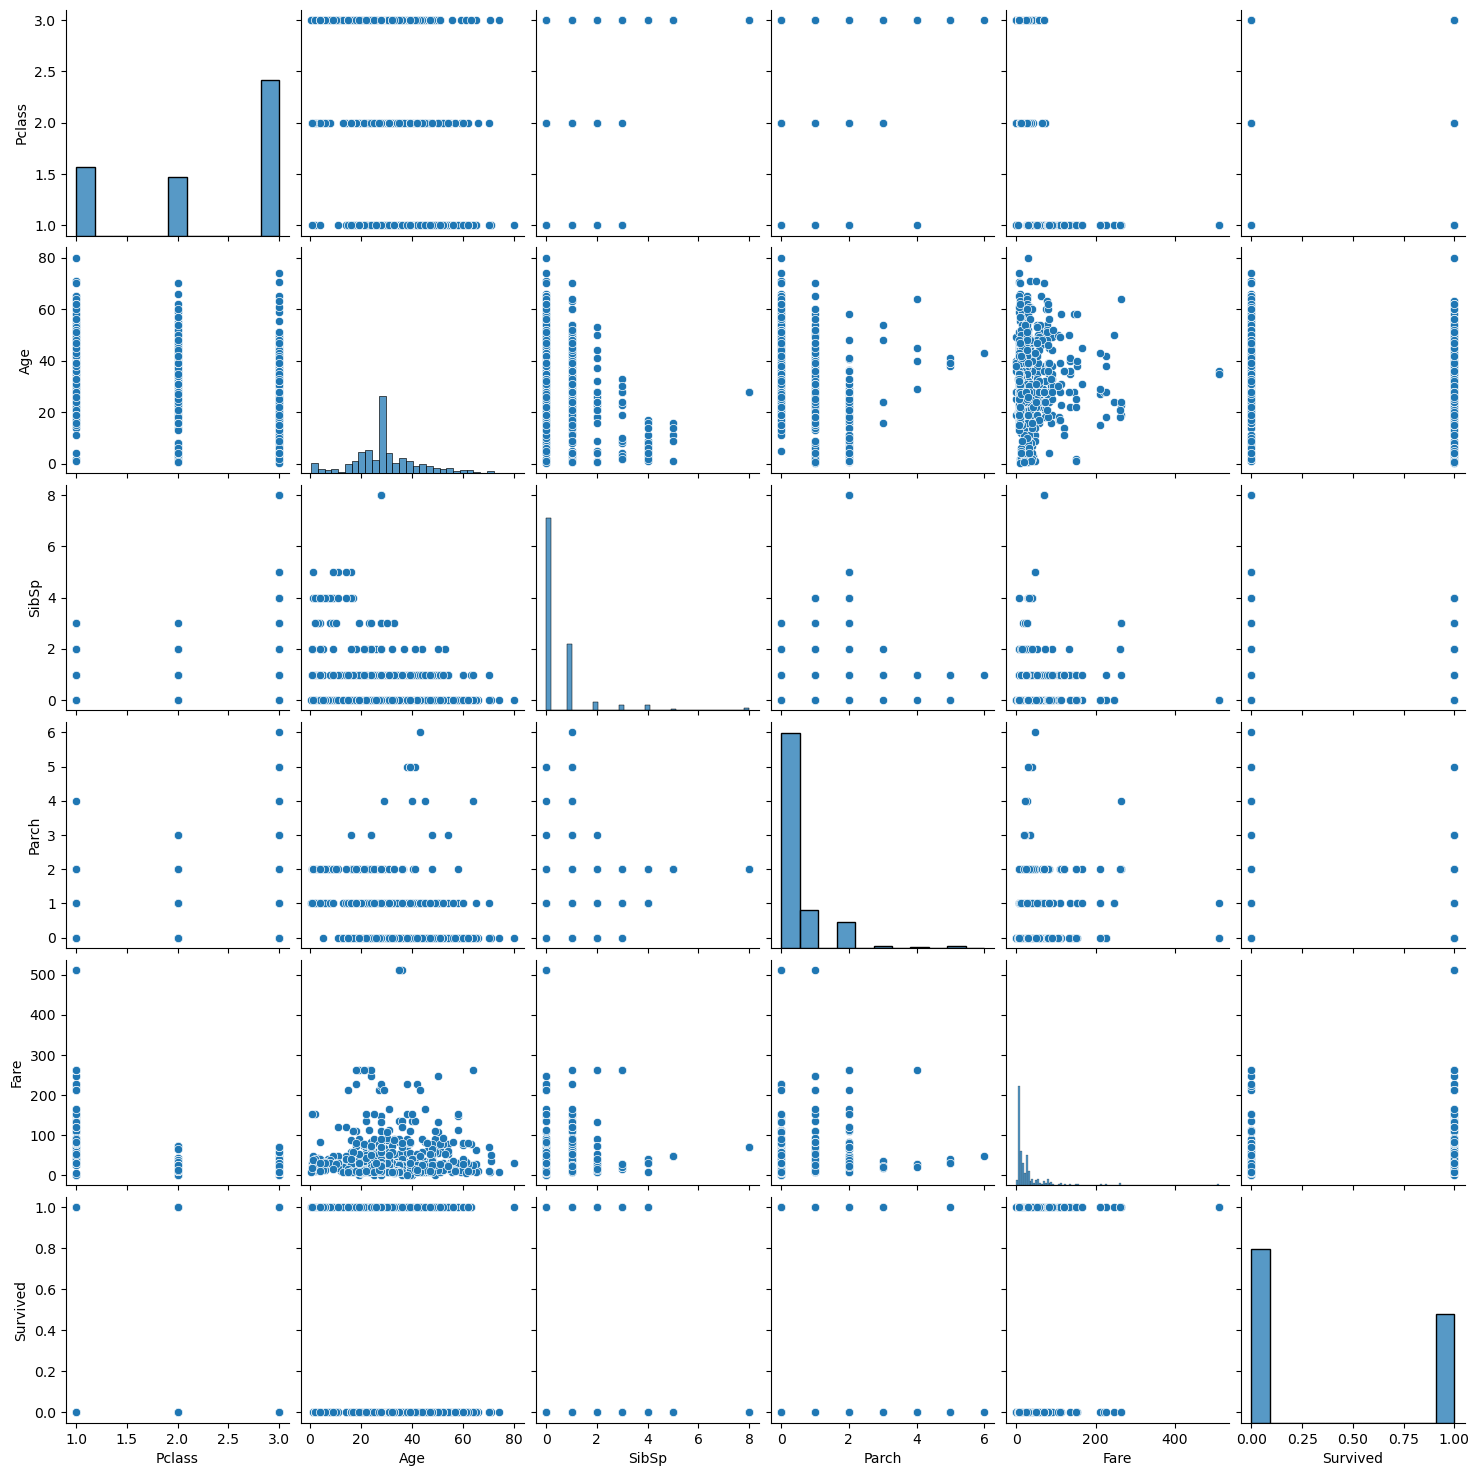

<Figure size 1200x1000 with 0 Axes>

In [20]:
#Exploration of variables - Pair plot
num_col = ['Pclass','Age','SibSp','Parch','Fare','Survived']
sns.pairplot(df[num_col])
plt.figure(figsize=(12, 10))
plt.tight_layout()
plt.show()

#### Interpretation:
Class and Survival: Higher-class passengers had higher survival rates as compared to the 3rd class passengers.

Fare and Survival: Passengers who paid higher fares also had higher survival rates, which is also linked to class.